In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import math
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("final.csv")

In [3]:
df

,DATE,Month,PRCP,TMAX,TMIN,AWND,TDIFF,WSF2,WSF5,intense,count of dry days,count of wet days
0,1995-11-01,11,0.183214,57.083333,47.291667,6.93500,9.791667,13.0000,17.9000,0,0,6
1,1995-11-02,11,0.728929,64.782609,52.130435,7.44000,12.652174,14.1000,17.9000,0,0,7
2,1995-11-03,11,0.137500,70.250000,54.333333,7.88750,15.916667,15.0000,19.9000,0,0,8
3,1995-11-04,11,0.015357,60.250000,37.375000,14.65250,22.875000,21.9000,30.0000,0,0,9
4,1995-11-05,11,0.000714,48.458333,32.333333,10.28750,16.125000,15.0000,19.9000,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
10313,2024-12-27,12,0.000000,39.400000,20.933333,2.71125,18.466667,9.4125,15.4250,0,2,0
10314,2024-12-28,12,0.252195,45.266667,29.066667,2.07000,16.200000,7.7875,11.4500,0,0,1
10315,2024-12-29,12,0.461310,54.133333,41.466667,7.60500,12.666667,21.9500,33.5125,0,0,2
10316,2024-12-30,12,0.369213,59.066667,45.200000,11.94125,13.866667,24.5000,36.7000,0,0,3


In [4]:
X = df[["Month","TMAX","TMIN","AWND","TDIFF","WSF2","WSF5","count of dry days","count of wet days"]]

y = df["PRCP"]

Split the Data

In [95]:
kf = KFold(shuffle=True, random_state=2, n_splits=3)

In [96]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 0  1  5  7  9 11 12 13 14 17] 6878
Test index: [ 2  3  4  6  8 10 15 16 18 20] 3440

Train index: [ 1  2  3  4  6  8  9 10 12 14] 6879
Test index: [ 0  5  7 11 13 19 21 34 35 36] 3439

Train index: [ 0  2  3  4  5  6  7  8 10 11] 6879
Test index: [ 1  9 12 14 17 23 24 25 26 29] 3439



Simple Linear Regression

In [97]:
scores = []
mses = []
rmses = []

lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr.predict(X_test_s)

    score = r2_score(y_test.values, y_pred)
    mse = mean_squared_error(y_test.values, y_pred)
    rmse = np.sqrt(mse)

    scores.append(score)
    mses.append(mse)
    rmses.append(rmse)
    

In [99]:
print("R2 Score")
print(scores)
print("MSE")
print(mses)
print("RMSE")
print(rmses)


R2 Score
[0.17961697256691622, 0.15492546952104358, 0.16625183892073836]
MSE
[0.06966285406495569, 0.08911078395919819, 0.0777750671546273]
RMSE
[np.float64(0.26393721614231613), np.float64(0.2985142943967645), np.float64(0.27888181574750853)]


Hyperparameter Tuning

Choose ridge because there are not enough data points to want to zero them out !

In [116]:
#Ridge Regression
scores = []
coefs = []
mses = []
rmses = []
# Different alphas for ridge regression
alphas = np.geomspace(1, 100, 100)

for alpha in alphas:
    rd = Ridge(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("ridge_regression", rd)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)

    scores.append(score)
    mses.append(mse)
    rmses.append(rmse)

In [117]:
print("R2 Scores")
print(scores)
print("MSE")
print(mses)
print("RMSE")
print(rmses)

R2 Scores
[0.16624091820841813, 0.16624099449875973, 0.16624107432771784, 0.16624115785469906, 0.16624124524582484, 0.16624133667416974, 0.16624143231999922, 0.1662415323710127, 0.16624163702258854, 0.1662417464780287, 0.16624186094880633, 0.16624198065481, 0.1662421058245892, 0.16624223669559446, 0.1662423735144143, 0.16624251653700528, 0.1662426660289147, 0.16624282226549258, 0.16624298553209182, 0.16624315612425322, 0.16624333434787186, 0.16624352051934255, 0.1662437149656817, 0.16624391802461969, 0.16624413004465888, 0.1662443513850964, 0.16624458241600193, 0.16624482351814618, 0.16624507508287656, 0.16624533751192672, 0.16624561121715886, 0.16624589662022626, 0.16624619415214825, 0.1662465042527873, 0.1662468273702179, 0.16624716395997463, 0.16624751448416575, 0.16624787941044106, 0.16624825921079667, 0.1662486543601991, 0.1662490653350155, 0.16624949261122413, 0.16624993666239374, 0.16625039795739838, 0.16625087695785468, 0.16625137411524904, 0.16625188986773032, 0.16625242463653

Text(0, 0.5, '$R^2$')

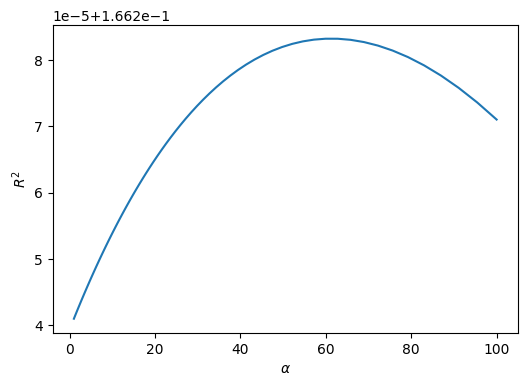

In [118]:
plt.figure(figsize=(6,4))
plt.plot(alphas, scores)
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$')

Adding Polynomial Features

In [110]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(1, 100, 100)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [111]:
grid.fit(X, y)
grid.best_score_, grid.best_params_

(np.float64(0.22201852326325885),
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': np.float64(100.0)})

Final Model using the Values from Above

In [119]:
# Using the values from above!
pf = PolynomialFeatures(degree=2)
rd = Ridge(alpha=100, max_iter=100000)

estimator = Pipeline([
    ("scaler", s),
    ("make_higher_degree", pf),
    ("ridge_regression", rd)])

predictions = cross_val_predict(estimator, X, y, cv = kf)
score = r2_score(y, predictions)

In [120]:
estimator.fit(X, y)
estimator.score(X, y)

0.23461405401543822

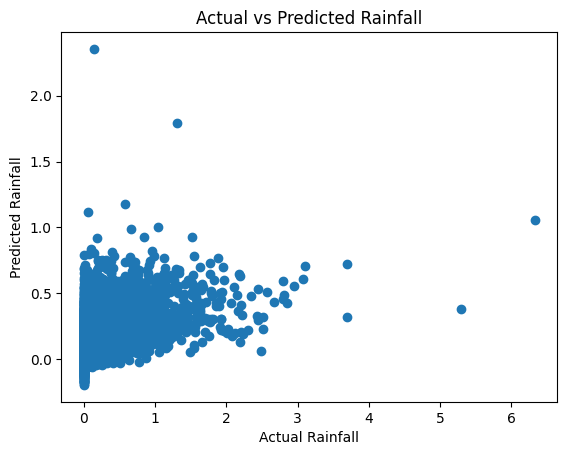

In [143]:
# Plot the regression line
plt.scatter(y, predictions)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.show()

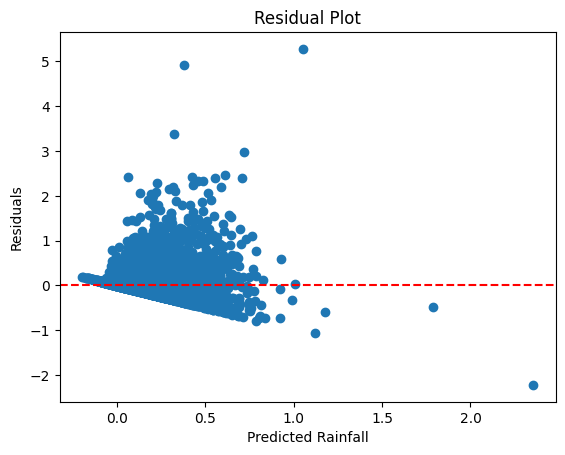

In [146]:
residuals = y - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [114]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [115]:
col_names_dict

{0: 'Month',
 1: 'TMAX',
 2: 'TMIN',
 3: 'AWND',
 4: 'TDIFF',
 5: 'WSF2',
 6: 'WSF5',
 7: 'count of dry days',
 8: 'count of wet days'}